<h1 align="center"><strong>Implementing Word Embeddings: Word2Vec</strong></h1>

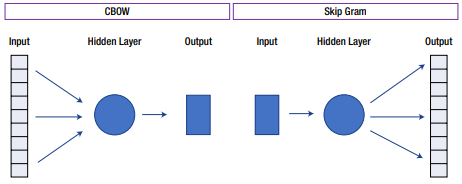

### How It Works

There are mainly 2 types in [word2vec](https://arxiv.org/abs/1310.4546)

### Getting Started

#### **Skip-Gram**

In [ ]:
import gensim
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

In [ ]:
sentences = [['I', 'love', 'nlp'],
             ['I', 'will', 'learn', 'nlp', 'in', '2','months'],
             ['nlp', 'is', 'future'],
             ['nlp', 'saves', 'time', 'and', 'solves',
              'lot', 'of', 'industry', 'problems'],
             ['nlp', 'uses', 'machine', 'learning']]

In [ ]:
# Training
skipgram = Word2Vec(sentences=sentences,
                    size=50,
                    window=3,
                    min_count=1,
                    sg=1)

In [ ]:
print(skipgram)

Word2Vec(vocab=21, size=50, alpha=0.025)


In [ ]:
list(skipgram.wv.vocab)

['I love nlp',
 'I',
 'will',
 'learn',
 'nlp',
 'in',
 '2',
 'months',
 'is',
 'future',
 'saves',
 'time',
 'and',
 'solves',
 'lot',
 'of',
 'industry',
 'problems',
 'uses',
 'machine',
 'learning']

In [ ]:
# access vector for one word
skipgram.wv["deep"]

In [ ]:
''' KeyError: "word 'deep' not in vocabulary" '''
skipgram.wv["deep"]

In [ ]:
# Save skip-gram model
skipgram.save("skipgram.bin")

# Load skip-gram model
skipgram = Word2Vec.load("skipgram.bin")

In [ ]:
list(skipgram.wv.vocab)

['I',
 'love',
 'nlp',
 'will',
 'learn',
 'in',
 '2',
 'months',
 'is',
 'future',
 'saves',
 'time',
 'and',
 'solves',
 'lot',
 'of',
 'industry',
 'problems',
 'uses',
 'machine',
 'learning']

##### `T-SNE`

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


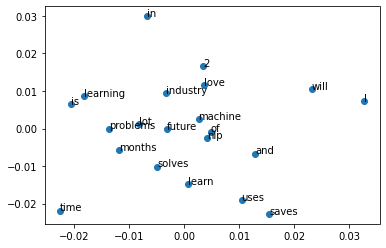

In [ ]:
X = skipgram[skipgram.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# Create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(skipgram.wv.vocab)
for i, word in enumerate(words):
  pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

---

#### **Continous Bag of Words (CBOW)**

In [ ]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

In [ ]:
# Example sentences
sentences = [['I', 'love', 'nlp'],
             ['I', 'will', 'learn', 'nlp', 'in', '2','months'],
             ['nlp', 'is', 'future'],
             ['nlp', 'saves', 'time', 'and', 'solves',
              'lot', 'of', 'industry', 'problems'],
             ['nlp', 'uses', 'machine', 'learning']]

In [ ]:
# Training the cbow model
cbow = Word2Vec(sentences, size =50, window = 3, min_count=1,sg = 0)
print(cbow)

Word2Vec(vocab=21, size=50, alpha=0.025)


In [ ]:
# save model
cbow.save('cbow.bin')

# load model
cbow = Word2Vec.load('cbow.bin')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


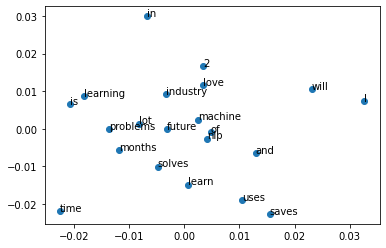

In [ ]:
X = cbow[cbow.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(cbow.wv.vocab)
for i, word in enumerate(words):
 pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

---

#### **More features**

To train these models, it requires a huge amount of computing
power. So, let us go ahead and use [Google’s pre-trained model](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit), which has
been trained with over 100 billion words.

In [ ]:
!gdown --id 0B7XkCwpI5KDYNlNUTTlSS21pQmM --quiet

In [ ]:
# unzip GoogleNews-vectors-negative300.bin.gz file
import gzip
import shutil
with gzip.open('GoogleNews-vectors-negative300.bin.gz', 'rb') as f_in:
    with open('GoogleNews-vectors-negative300.bin', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [ ]:
import gensim
from gensim.models import KeyedVectors

# Load the saved model
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

# Checking how similarity works.
print (model.similarity('this', 'is'))

0.40797037


In [ ]:
len(list(model.wv.vocab))

In [ ]:
# Lets check one more.
print (model.similarity('post', 'book'))

0.057204384


In [ ]:
# Lets check one more.
print (model.similarity('Rome', 'Paris'))

0.55004156


In [ ]:
# It is also finding the relations between words.
model.most_similar(positive=['woman', 'king'], negative=['man'])

[('queen', 0.7118192911148071),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.518113374710083),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411999702454)]

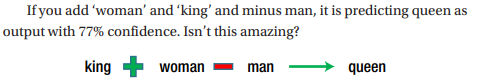

In [ ]:
# Finding the odd one out.
model.doesnt_match('breakfast cereal dinner lunch'.split())

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'cereal'

Update changelog for 4.0.0 release to fix the FutureWarning

---
### **TO DO**
> Use word2vec to vectorize the `entire sentence` into a `single vector`?

* **Clue:** Think about the **`mean`** !

In [ ]:
!pip install gensim --quiet

download the pre-trained word2vec model availbale [here](http://vectors.nlpl.eu/repository/20/40.zip)

In [ ]:
!wget http://vectors.nlpl.eu/repository/20/40.zip --quiet
!unzip 40.zip

Archive:  40.zip
  inflating: LIST                    
  inflating: meta.json               
  inflating: model.bin               
  inflating: model.txt               
  inflating: README                  


In [ ]:
from gensim.models import KeyedVectors
import numpy as np

In [ ]:
w2vec_model_path = "model.bin"
model = KeyedVectors.load_word2vec_format(w2vec_model_path, binary=True)

In [ ]:
model["holmes"]

array([-0.309647, -0.127936, -0.136244, -0.252969,  0.410695,  0.206325,
        0.119236, -0.244745, -0.436801,  0.058889,  0.237439,  0.247656,
        0.072103,  0.044183, -0.424878,  0.367344,  0.153287,  0.343856,
        0.232269, -0.181432, -0.050021,  0.225756,  0.71465 , -0.564166,
       -0.168468, -0.153668,  0.300445, -0.220122, -0.021261,  0.25779 ,
       -0.581744,  0.320341, -0.236189,  0.224906,  0.029358, -0.295143,
        0.483847, -0.05832 ,  0.010784,  0.050842, -0.034141,  0.420114,
        0.126926, -0.405974, -0.421415,  0.006092, -0.137557,  0.038477,
        0.100005,  0.151401,  0.287163, -0.433263, -0.249083, -0.057834,
        0.367427, -0.181977,  0.31608 ,  0.063203, -0.486009, -0.127354,
       -0.283149,  0.028113, -0.150146, -0.38704 ,  0.033237,  0.146932,
        0.470853, -0.151154,  0.064424,  0.146739, -0.164267, -0.094909,
        0.443384, -0.055244,  0.117268, -0.221496, -0.185951,  0.056249,
       -0.176986, -0.449508,  0.345431, -0.096014, 

In [ ]:
model.most_similar(['holmes'], topn=5)

[('sherlock', 0.8416914939880371),
 ('parker', 0.8099909424781799),
 ('moriarty', 0.8039606809616089),
 ('sawyer', 0.8002701997756958),
 ('moore', 0.7932805418968201)]

In [ ]:
model.most_similar(['king'], topn=5)

[('queen', 0.8029258251190186),
 ('prince', 0.773180365562439),
 ('prunaprismia', 0.7698008418083191),
 ('throne', 0.769690215587616),
 ('buwanekabahu', 0.7684906721115112)]

In [ ]:
model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)

[('queen', 0.8487650156021118)]

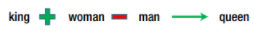

In [ ]:
sentence = "It was not that he felt any emotion akin to love for Irene Adler"

Let's define a function that will take a **sentence** and a **model** and will return a **list** of the sentence word vectors:

In [ ]:
def get_word_vectors(sentence, model):
  word_vectors = []
  for word in sentence:
    try:
      word_vector = model.get_vector(word.lower())
      word_vectors.append(word_vector)
    except KeyError:
      continue
  return word_vectors

Let's print the vectors of the sentence words. Note, this model is taking `n-gram` level into consideration. For this reason, the number of words is smaller than the number of vectors.

In [ ]:
print(get_word_vectors(sentence, model)[:2])

[array([ 0.342646,  0.057677,  0.143244, -0.464352,  0.233713, -0.308506,
        0.066462, -0.348036,  0.298951,  0.361289, -0.14727 ,  0.502373,
        0.277486,  0.399235, -0.090296,  0.441154,  0.228387,  0.248074,
        0.133495,  0.297991,  0.216865,  0.106718, -0.36284 , -0.712249,
       -0.123415, -0.016303, -0.035776, -0.37227 ,  0.1253  ,  0.079849,
       -0.204326,  0.091829, -0.193901,  0.166729, -0.156868, -0.128699,
        0.086192, -0.006307,  0.052609, -0.331948, -0.059798, -0.009533,
       -0.174509,  0.057048,  0.06186 ,  0.478577,  0.217334,  0.06157 ,
       -0.140354,  0.303486, -0.092714, -0.596469, -0.132788,  0.13608 ,
       -0.363305,  0.078307,  0.247823, -0.064118, -0.1071  ,  0.037902,
       -0.152804, -0.250827, -0.626714,  0.051925, -0.118149,  0.03284 ,
        0.280331,  0.371999,  0.158893,  0.017888,  0.031942,  0.115191,
        0.04824 , -0.493699,  0.246565,  0.069367, -0.555494,  0.327496,
        0.276469, -0.033059,  0.158782,  0.524047,

Now, let's define a function that will take the word vector list and compute the sentence vector the numpy build-in function `mean()`

In [ ]:
def get_sentence_vector(word_vectors):
  matrix = np.array(word_vectors)
  centroid = np.mean(matrix[:,:], axis=0)
  return centroid

`Important Note`
> Averaging the word vectors (mean) to get the sentence vector is only one way of
approaching this task, and is not without its problems. One alternative is to
train a doc2vec model, where sentences, paragraphs, and whole documents can
all be units instead of words.

We can now compute the sentence vector

In [ ]:
word_vectors = get_word_vectors(sentence, model)
sentence_vector = get_sentence_vector(word_vectors)

print(sentence_vector)

[ 0.09181425  0.15028009  0.23886335 -0.32302463  0.43024594 -0.0576652
  0.1289581   0.01948925 -0.00518169  0.05343727  0.14825349  0.34495983
  0.13272947  0.05608438 -0.09138513  0.38390496  0.0778565   0.3021314
 -0.2509534   0.42235532 -0.13581464  0.15995607  0.19637276 -0.13049784
 -0.16852486  0.19896786 -0.1825887   0.00321069  0.23088776  0.01139577
  0.08455776  0.05330068 -0.27108222  0.00711256  0.19430234 -0.21419361
 -0.09746335  0.02194656  0.16047275 -0.03786248 -0.02989919  0.3662489
 -0.14537916  0.08163083  0.14008534  0.4443864  -0.14930542  0.10604608
 -0.18289441  0.11659104 -0.18698621 -0.02354209 -0.11111044 -0.1986528
 -0.05731854  0.01502543  0.35236928  0.1760287  -0.31854567 -0.11829486
 -0.08492462  0.15937866  0.12598619 -0.3296073   0.01171029 -0.04234619
  0.35265708 -0.13927169 -0.20887235 -0.03444232  0.31586298 -0.0095432
  0.2551441  -0.14954203 -0.23829935 -0.33254564 -0.41208652  0.42861548
 -0.0586994   0.07393356  0.06321189  0.2402386   0.1643

This output represents the vector of the entire sentence, which of size 100

In [ ]:
len(sentence_vector)

100